In [55]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [58]:
gdown.download('https://drive.google.com/file/d/1knFfDbv5RRwIH_775iCEqqPX42aTPQ0M/view?usp=sharing',fuzzy=True)


Downloading...
From (original): https://drive.google.com/uc?id=1knFfDbv5RRwIH_775iCEqqPX42aTPQ0M
From (redirected): https://drive.google.com/uc?id=1knFfDbv5RRwIH_775iCEqqPX42aTPQ0M&confirm=t&uuid=0cba4d7a-f3b2-43c7-9d86-28052098943b
To: /content/data_log1p.npz
100%|██████████| 1.28G/1.28G [00:30<00:00, 41.7MB/s]


'data_log1p.npz'

In [60]:
gdown.download('https://drive.google.com/file/d/1mn_TfZbQ35Ojxs6ZbG0oZAd3-MlyTJLQ/view?usp=sharing',fuzzy=True )


Downloading...
From: https://drive.google.com/uc?id=1mn_TfZbQ35Ojxs6ZbG0oZAd3-MlyTJLQ
To: /content/data.json
100%|██████████| 781k/781k [00:00<00:00, 9.09MB/s]


'data.json'

In [61]:
loaded_data  = np.load('data_log1p.npz') #load the array saved in the data processing step

In [62]:
A = loaded_data['gtexdatalog'] #get the exact variable

In [10]:
A.shape #27 Tissues, 943 Donors, 19121 Genes

(27, 943, 19121)

In [13]:
with open('data.json', 'r') as f:
    [tissue_index, donor_index, gene_index, tissue_donor] = json.load(f) #loading other arrays saved in the data processing step

In [63]:
tissue_index

{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

In [14]:
len(tissue_index) #length of tissues

27

In [15]:
len(donor_index) #length of donors

943

In [16]:
len(gene_index) #length of genes

19121

In [17]:
len(tissue_donor) #Donors relating to each tissue

27

In [ ]:
tissue_index


{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

### Gene Expression Variability Analysis :
##### Identify candidate genes g1 and g2:
* g1: Expression is highly variable across samples within a tissue but shows poor co-expression between any two tissues.
* g2: High co-expression between most tissue pairs, indicating possible polymorphic influence.


In [23]:
g1_candidates = [] #initialise array for g1
g2_candidates = []#initialise array for g2
for gene in gene_index.values(): #loop through all genes
    gene_expression = A[:, :, gene] #Get the genes which are mean TMP>10,and creates a 2D array
    tissue_variance = np.var(gene_expression, axis=1) #calculate the variance across donors
    co_expression_matrix = np.corrcoef(gene_expression)# calculate the pearson Correlation Coefficient
    np.fill_diagonal(co_expression_matrix, np.nan) #fill diagonal value with nan
    # g1: High variability within tissue and poor co-expression between tissues
    if np.any(tissue_variance > np.mean(tissue_variance) + np.std(tissue_variance)):
        if np.all(np.nan_to_num(co_expression_matrix) < 0.15):  # Poor co-expression threshold
            g1_candidates.append(gene)
    # g2: High co-expression between most tissue pairs
    if np.nanmean(co_expression_matrix) > 0.25:
        g2_candidates.append(gene)


In [24]:
len(g1_candidates) #number of g1 candidate genes


13

In [25]:
len(g2_candidates) #number of g2 candidate genes

9

In [26]:
g1_candidates

[2340,
 11377,
 11796,
 15493,
 15899,
 16071,
 16128,
 16147,
 16530,
 17094,
 17705,
 18377,
 18395]

In [27]:
g2_candidates

[5309, 6168, 7749, 8490, 15204, 15602, 15762, 16002, 16103]

### Verification g1

In [28]:
print(list(gene_index.keys())[2340])

ENSG00000101435.4#CST9L


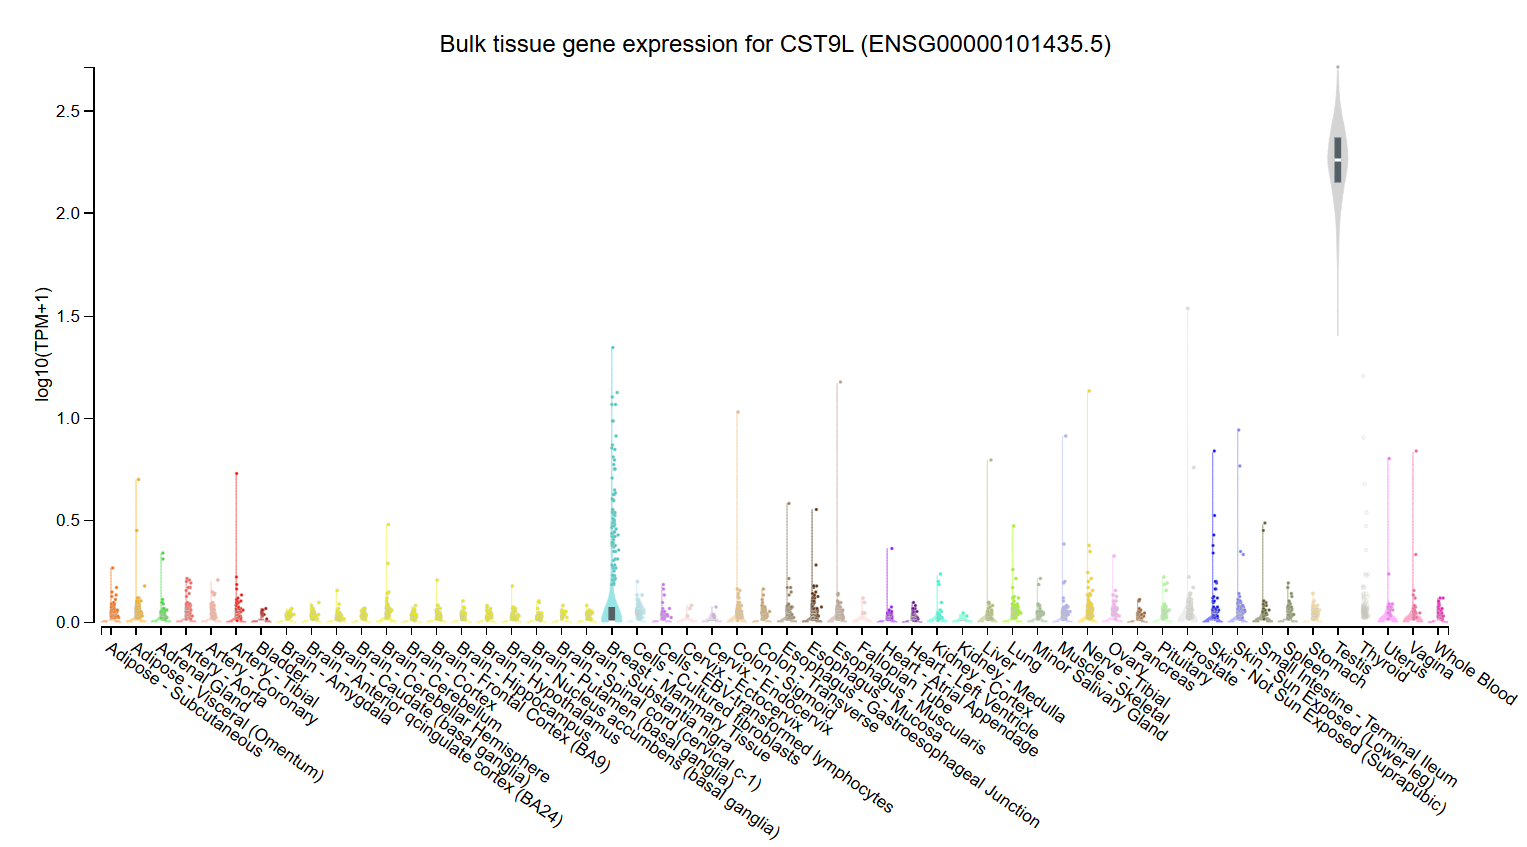

In [29]:
gene_expression = A[:, :, 2340]

In [30]:
tissue_variance = np.var(gene_expression, axis=1)

In [31]:
tissue_variance.shape

(27,)

In [32]:
tissue_variance

array([1.01194167e-03, 7.66734445e-04, 3.63111659e-03, 8.19652843e-04,
       1.12943874e-01, 6.38964635e-04, 1.49486649e-03, 2.31961577e-04,
       4.74488398e-04, 2.89484108e-03, 2.02304071e-03, 5.55678572e-04,
       4.82853872e-03, 2.47765354e-03, 8.90793141e-04, 2.37666248e-04,
       8.02084814e-04, 1.43919167e-02, 8.10179288e-03, 1.83047012e-03,
       5.22576387e-04, 6.92284499e-04, 5.72772177e+00, 1.58926629e-02,
       3.01231441e-03, 3.65946180e-03, 3.47720692e-04])

In [33]:
co_expression_matrix = np.corrcoef(gene_expression)

In [34]:
co_expression_matrix.shape

(27, 27)

In [35]:
np.fill_diagonal(co_expression_matrix, np.nan)

In [36]:
np.any(tissue_variance > np.mean(tissue_variance) + np.std(tissue_variance))

True

In [37]:
np.mean(tissue_variance) + np.std(tissue_variance)

1.2995527113538163

In [38]:
tissue_variance[tissue_variance > np.mean(tissue_variance) + np.std(tissue_variance)]

array([5.72772177])

In [39]:
np.all(np.nan_to_num(co_expression_matrix) < 0.15)

True

In [40]:
np.nanmean(co_expression_matrix) > 0.25

False

In [41]:
print(list(gene_index.keys())[5309])

ENSG00000126890.13#CTAG2


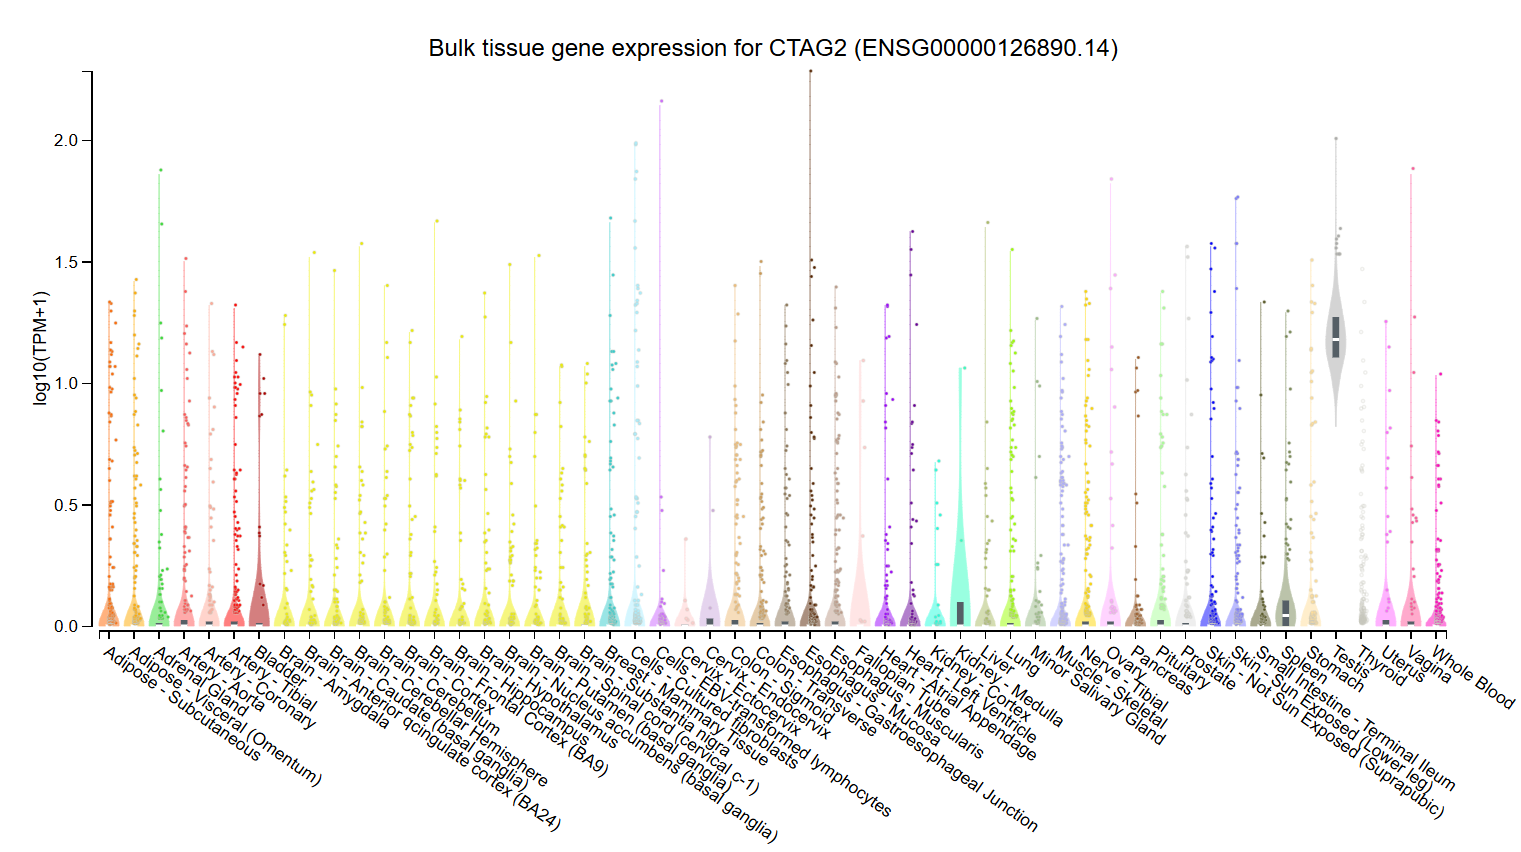

In [42]:
gene_expression = A[:, :, 5309]

In [43]:
tissue_variance = np.var(gene_expression, axis=1)

In [44]:
tissue_variance


array([0.14387708, 0.06511045, 0.12220856, 0.04446608, 0.10843748,
       0.05533312, 0.12583801, 0.06814717, 0.00890427, 0.03048729,
       0.12532793, 0.01731489, 0.13222904, 0.1492708 , 0.05575268,
       0.0214106 , 0.06644629, 0.05746619, 0.11839621, 0.02433634,
       0.05179444, 0.08932116, 1.76660622, 0.09278767, 0.03574508,
       0.04438637, 0.04417223])

In [45]:
co_expression_matrix = np.corrcoef(gene_expression)

In [46]:
np.any(tissue_variance > np.mean(tissue_variance) + np.std(tissue_variance))

True

In [47]:
np.mean(tissue_variance) + np.std(tissue_variance)

0.45822642351330084

In [48]:
tissue_variance[tissue_variance > np.mean(tissue_variance) + np.std(tissue_variance)]

array([1.76660622])

In [49]:
np.all(np.nan_to_num(co_expression_matrix) < 0.15)

False

In [50]:
np.nanmean(co_expression_matrix) > 0.25

True

### g1 candidate gene (Based on the threshold 0.15)

In [51]:
[key for key, value in gene_index.items() if value in g1_candidates]

['ENSG00000101435.4#CST9L',
 'ENSG00000170948.3#MBD3L1',
 'ENSG00000173464.14#RNASE11',
 'ENSG00000220483.4#SLC25A51P1',
 'ENSG00000228309.6#LINC01350',
 'ENSG00000230651.7#RGPD4-AS1',
 'ENSG00000231575.1#RP11-162K11.4',
 'ENSG00000231898.8#AC012594.1',
 'ENSG00000237265.6#RP11-402P6.9',
 'ENSG00000249407.1#IL20RB-AS1',
 'ENSG00000259817.2#RP11-53L24.1',
 'ENSG00000271065.1#RP11-607P23.1',
 'ENSG00000271573.1#RP11-96C23.12']

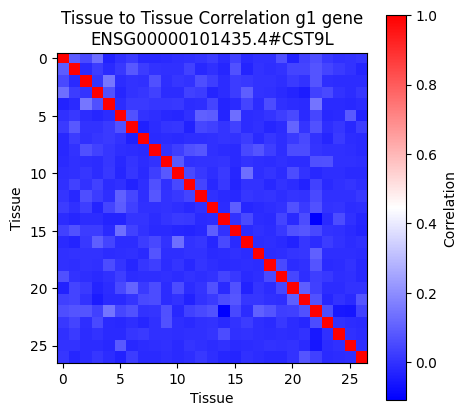

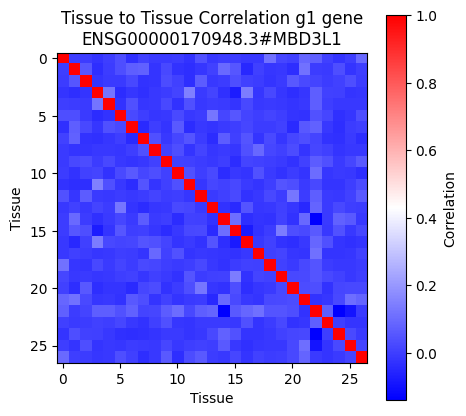

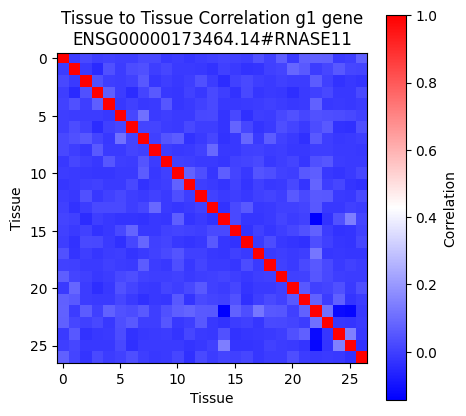

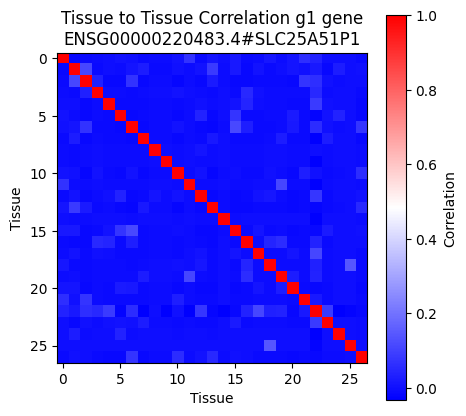

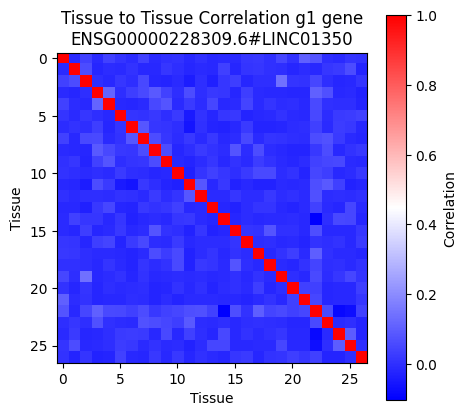

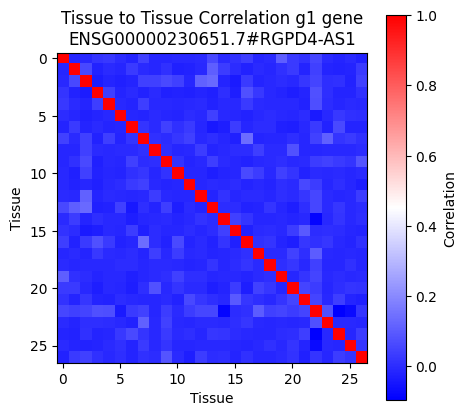

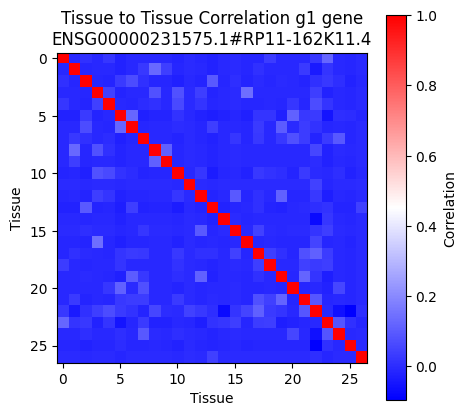

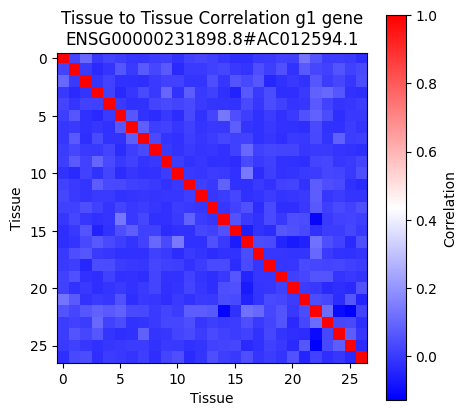

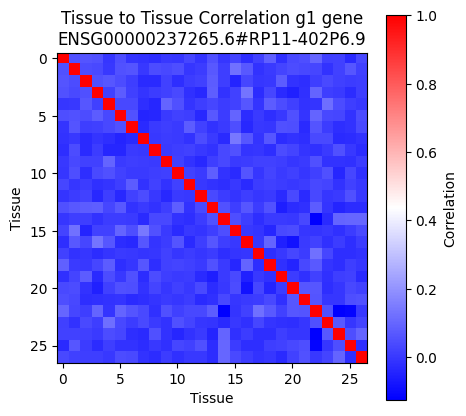

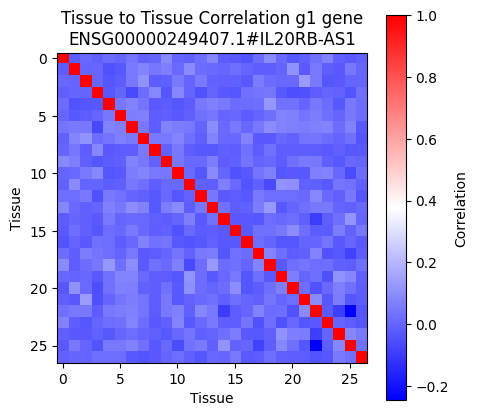

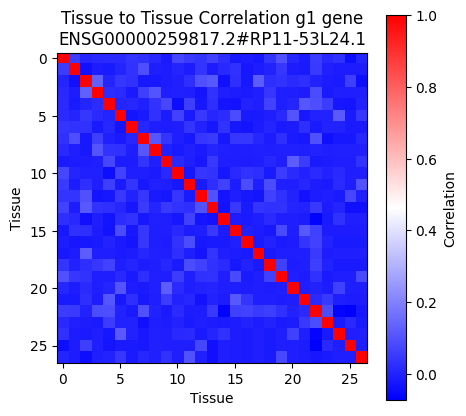

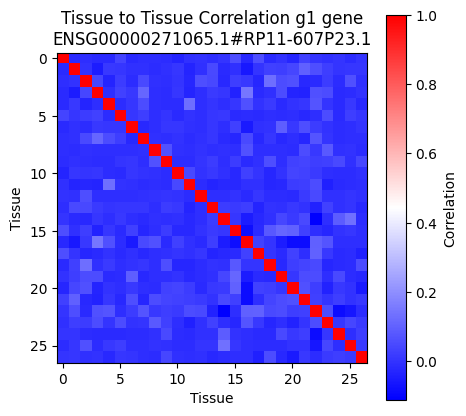

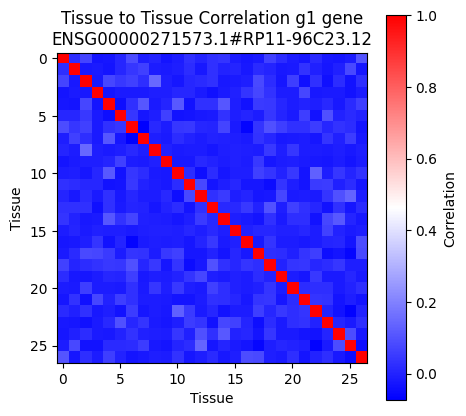

In [52]:
for g in g1_candidates:
  gene_expression = A[:, :, g]
  co_expression_matrix = np.corrcoef(gene_expression)
  plt.figure(figsize=(5, 5))
  plt.imshow(co_expression_matrix, cmap='bwr')
  plt.colorbar(label='Correlation')
  plt.title("Tissue to Tissue Correlation g1 gene\n" + list(gene_index.keys())[g])
  plt.xlabel('Tissue')
  plt.ylabel('Tissue')
  plt.show()

SLC25A51P1 gene is mostly blue in color and show lowest correlation

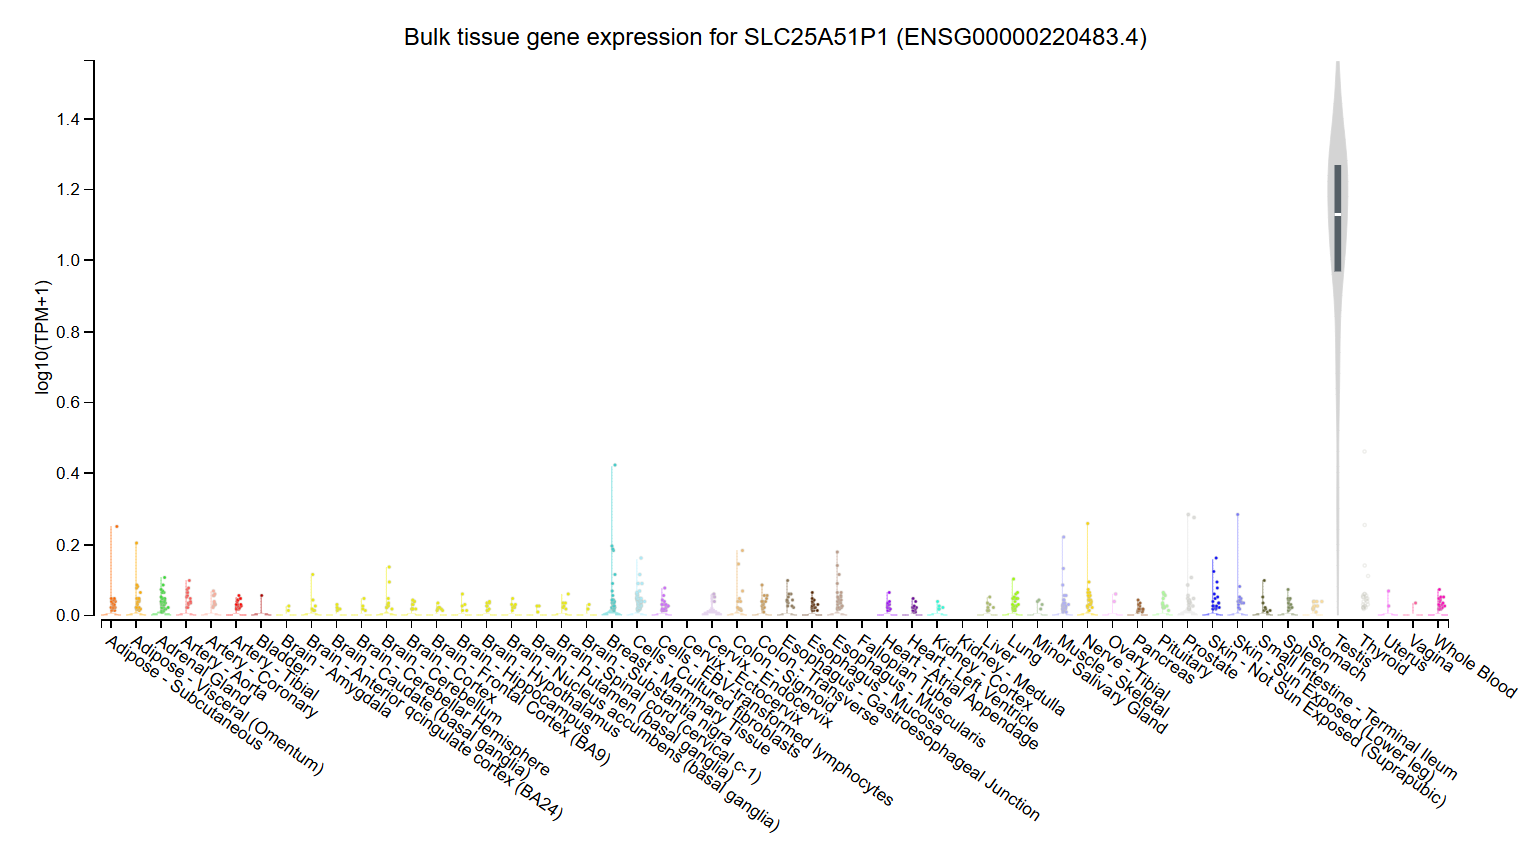

### g2 candidate gene (Based on the threshold mean 0.25)

In [53]:
[key for key, value in gene_index.items() if value in g2_candidates]

['ENSG00000126890.13#CTAG2',
 'ENSG00000134184.12#GSTM1',
 'ENSG00000144820.7#ADGRG7',
 'ENSG00000152266.6#PTH',
 'ENSG00000213058.3#RP4-765C7.2',
 'ENSG00000224114.1#RP11-343H5.4',
 'ENSG00000226278.1#PSPHP1',
 'ENSG00000229807.10#XIST',
 'ENSG00000231130.1#HLA-T']

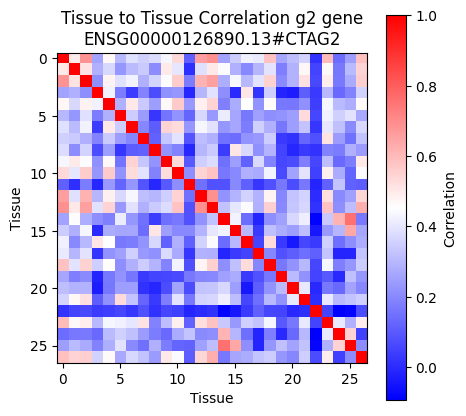

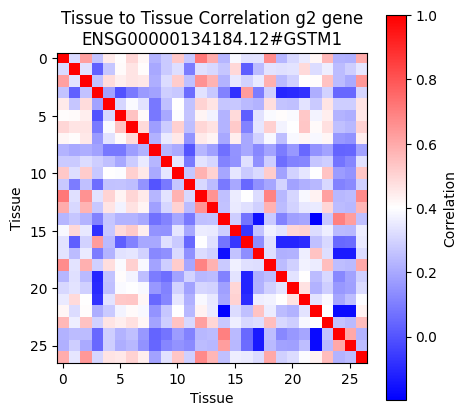

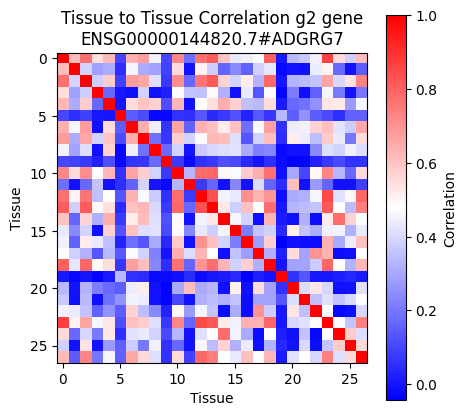

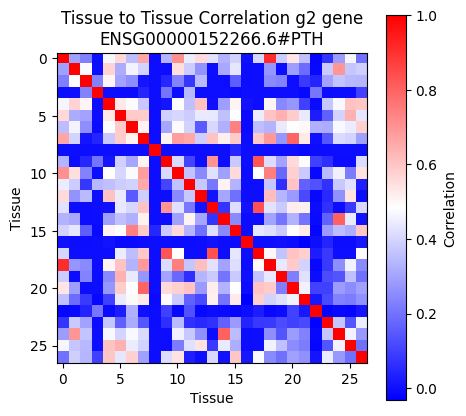

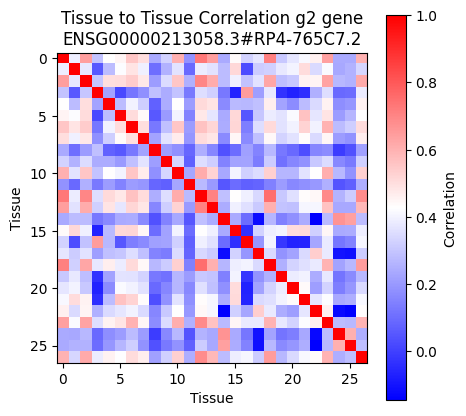

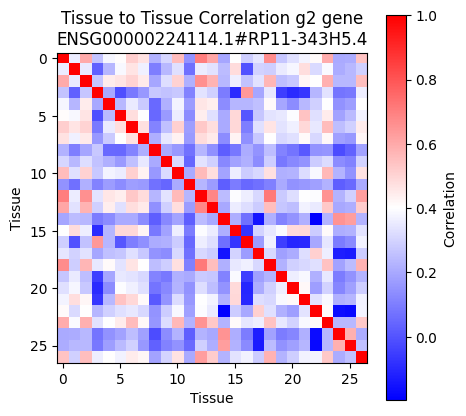

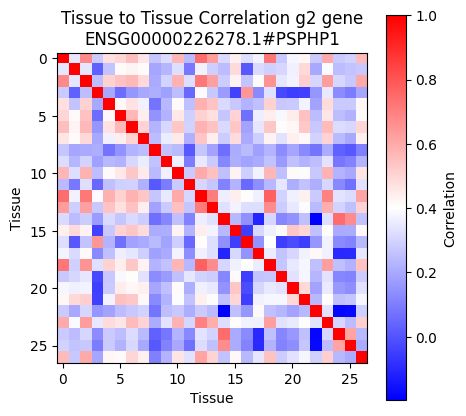

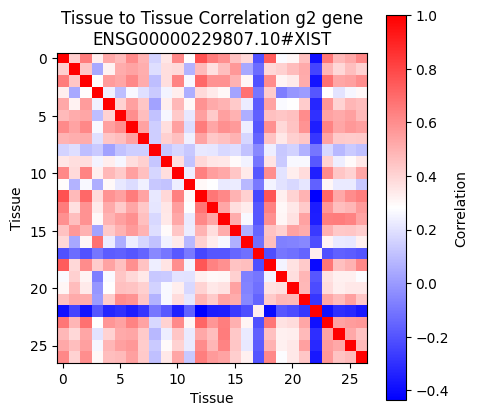

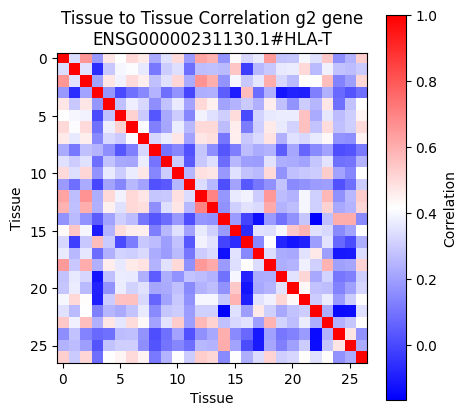

In [54]:
for g in g2_candidates:
    gene_expression = A[:, :, g]
    co_expression_matrix = np.corrcoef(gene_expression)
    plt.figure(figsize=(5, 5))
    plt.imshow(co_expression_matrix, cmap='bwr')
    plt.colorbar(label='Correlation')
    plt.title("Tissue to Tissue Correlation g2 gene\n" + list(gene_index.keys())[g])
    plt.xlabel('Tissue')
    plt.ylabel('Tissue')
    plt.show()

#### XIST is mostly red in color and show highet correlation

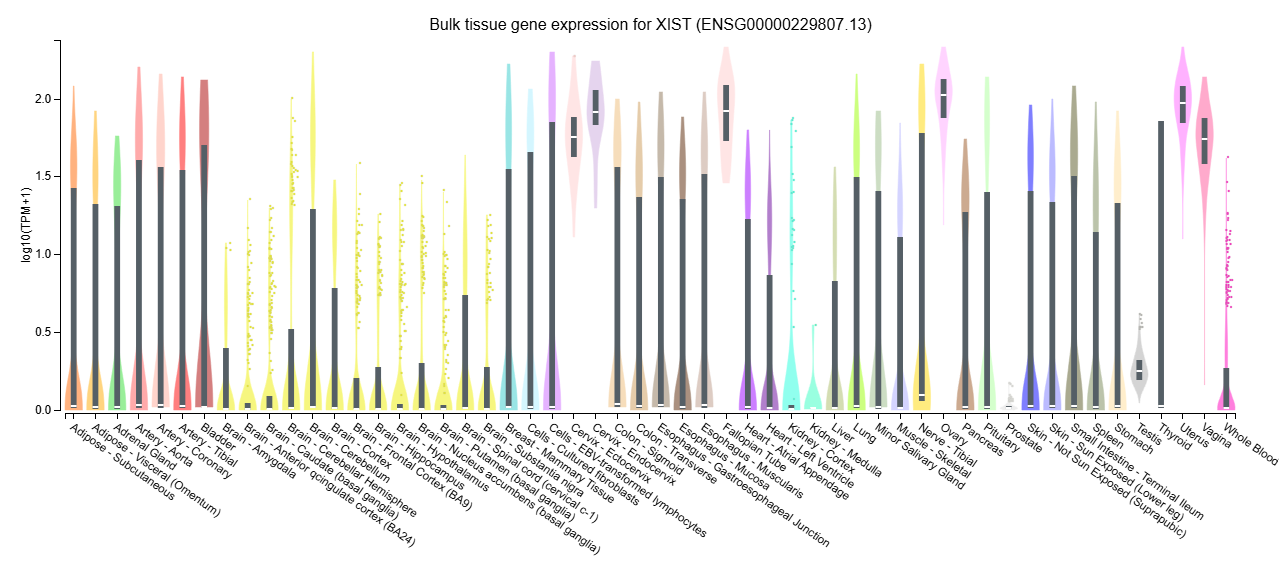